In [307]:
import os

In [308]:
print(os.getcwd());

C:\Users\MaryClare\desktop


In [309]:
os.chdir('desktop')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'desktop'

In [310]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
18]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA


SyntaxError: invalid syntax (<ipython-input-310-2f4730898cb8>, line 15)

In [311]:
#Importing Iris train and test files
mydftrain = pd.read_csv("iris_train.csv")
mydftest = pd.read_csv("iris_test.csv")

In [312]:
mydftrain.head()
#Data is labelled and has 4 features 0,1,2,3

,Unnamed: 0,0,1,2,3,labels
0,0,6.3,2.9,5.6,1.8,Iris-virginica
1,1,5.6,3.0,4.5,1.5,Iris-versicolor
2,2,7.9,3.8,6.4,2.0,Iris-virginica
3,3,6.5,2.8,4.6,1.5,Iris-versicolor
4,4,5.0,2.0,3.5,1.0,Iris-versicolor


In [313]:
mydftest.head()

,Unnamed: 0,0,1,2,3
0,0,7.2,3.6,6.1,2.5
1,1,4.7,3.2,1.3,0.2
2,2,4.4,3.2,1.3,0.2
3,3,4.5,2.3,1.3,0.3
4,4,6.4,3.2,4.5,1.5


In [314]:
mydftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
Unnamed: 0    110 non-null int64
0             110 non-null float64
1             110 non-null float64
2             110 non-null float64
3             110 non-null float64
labels        110 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 5.2+ KB


In [315]:
###Data Prepearation
#Cleaning up the dataset 
#Checking for missing data
mydftrain.isnull().sum().sum()

0

In [316]:
#Statistical Summary 
mydftrain.describe()

,Unnamed: 0,0,1,2,3
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,54.500000,5.883636,3.064545,3.753636,1.176364
std,31.898276,0.852361,0.457473,1.781128,0.753698
min,0.000000,4.400000,2.000000,1.000000,0.100000
25%,27.250000,5.100000,2.800000,1.600000,0.300000
50%,54.500000,5.700000,3.000000,4.250000,1.300000
75%,81.750000,6.500000,3.300000,5.100000,1.800000
max,109.000000,7.900000,4.400000,6.900000,2.500000


In [317]:
#A look at the labels distribution
print(mydftrain.groupby('labels').size())

labels
Iris-setosa        37
Iris-versicolor    38
Iris-virginica     35
dtype: int64


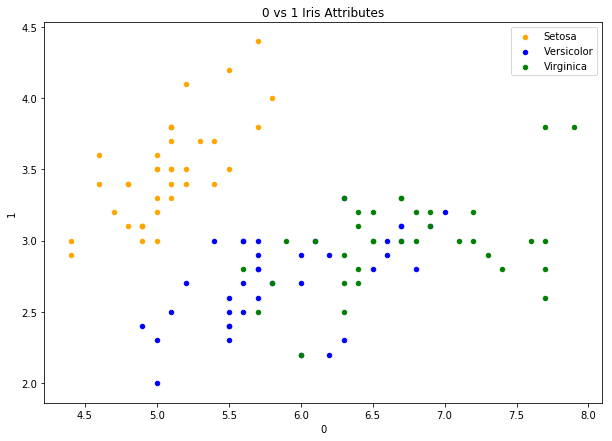

In [318]:
#Scatter Plot for Multivariate distribution - '0' & '1'
#From the distribution we can be able to classify setosa from the rest but there is overlap between Versicolor and Virginica 
graph = mydftrain[mydftrain.labels == 'Iris-setosa'].plot(kind='scatter', x= '0', y='1', color='orange', label='Setosa')
mydf[mydftrain.labels == 'Iris-versicolor'].plot(kind='scatter', x='0', y='1', color='blue', label='Versicolor', ax=graph)
mydf[mydftrain.labels == 'Iris-virginica'].plot(kind='scatter', x='0', y='1', color='green', label='Virginica', ax=graph)

graph.set_xlabel('0')
graph.set_ylabel('1')
graph.set_title('0 vs 1 Iris Attributes')

graph=plt.gcf()
graph.set_size_inches(10, 7)
plt.show()

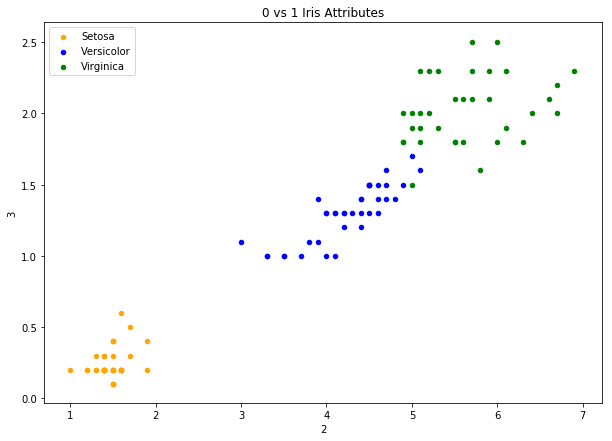

In [319]:
#Scatter Plot for Multivariate distribution - '2' & '3'
#From the distribution we can be able to classify our labels with attribute '2' and '3' without much overlap
graph = mydftrain[mydftrain.labels == 'Iris-setosa'].plot(kind='scatter', x= '2', y='3', color='orange', label='Setosa')
mydf[mydftrain.labels == 'Iris-versicolor'].plot(kind='scatter', x='2', y='3', color='blue', label='Versicolor', ax=graph)
mydf[mydftrain.labels == 'Iris-virginica'].plot(kind='scatter', x='2', y='3', color='green', label='Virginica', ax=graph)

graph.set_xlabel('2')
graph.set_ylabel('3')
graph.set_title('0 vs 1 Iris Attributes')

graph=plt.gcf()
graph.set_size_inches(10, 7)
plt.show()

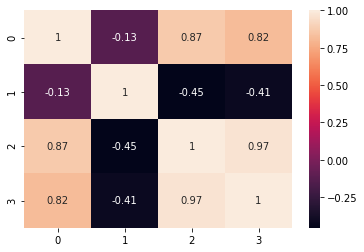

In [352]:
#Correlation Matrix to see variable contribution
droppedaxisdf=mydftrain.drop("Unnamed: 0", axis= 1)
plt.figure()
sns.heatmap(droppedaxisdf.corr(), annot = True)
plt.show()

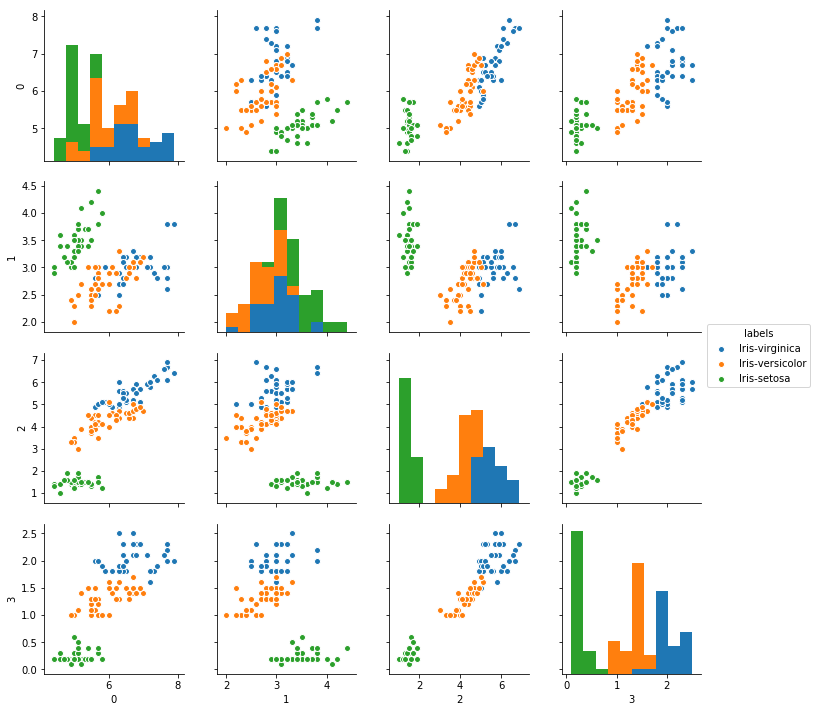

In [353]:
sns.pairplot(droppedaxisdf, hue="labels")

# Splitting The Data into Training And Testing Dataset

In [321]:
#From the observation '0' & '1' are not correlated however '2' & '3' are highly positive correlated. However,
#I will train on all features and compare accuracy to the features that are highly correlated

train, test = train_test_split(mydftrain, test_size=0.4, random_state=0)

print(train.shape)
print(test.shape)

(66, 6)
(44, 6)


In [322]:
#Model Training Features
train_x = mydftrain[['0', '1','2','3']] 
train_y = mydftrain.labels 

In [323]:
#Model Testing Features
test_x = mydftrain[['0','1','2','3']] 
test_y = mydftrain.labels

In [324]:
train_x.head()

,0,1,2,3
0,6.3,2.9,5.6,1.8
1,5.6,3.0,4.5,1.5
2,7.9,3.8,6.4,2.0
3,6.5,2.8,4.6,1.5
4,5.0,2.0,3.5,1.0


In [325]:
train_y.head()

0     Iris-virginica
1    Iris-versicolor
2     Iris-virginica
3    Iris-versicolor
4    Iris-versicolor
Name: labels, dtype: object

In [326]:
test_x.head()

,0,1,2,3
0,6.3,2.9,5.6,1.8
1,5.6,3.0,4.5,1.5
2,7.9,3.8,6.4,2.0
3,6.5,2.8,4.6,1.5
4,5.0,2.0,3.5,1.0


In [327]:
test_y.head()

0     Iris-virginica
1    Iris-versicolor
2     Iris-virginica
3    Iris-versicolor
4    Iris-versicolor
Name: labels, dtype: object

In [328]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

# Support Vector Machine Model #1

In [365]:
model = svm.SVC()
model = SVC(kernel= 'linear', C=1E10)
model.fit(train_x, train_y)
y_predict = model.predict(test_x)
print ("The prediction accuracy for SVM is = ", metrics.accuracy_score(y_predict, test_y))

The prediction accuracy for SVM is =  1.0


# Naive Bayes Classification model#2

In [330]:
model = GaussianNB()
model.fit(train_x, train_y);
y_pred = model.predict(test_x)

In [331]:
print ("The prediction accuracy for NB is = ", metrics.accuracy_score(y_pred, test_y))

The prediction accuracy for NB is =  0.9818181818181818


# KNN Classification model#2

In [344]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The prediction accuracy for KNN is: ', metrics.accuracy_score(prediction, test_y))

The prediction accuracy for KNN is:  0.9818181818181818


# Logistic Regression Classification

In [333]:
model = LogisticRegression()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The prediction accuracy for LR is: ', metrics.accuracy_score(prediction, test_y))

The prediction accuracy for LR is:  0.9636363636363636


# Comparing 0&1 vs 2&3 accuracy levels

In [334]:
First_attributes = mydftrain[['0','1','labels']]
Second_attributes = mydftrain[['2','3','labels']]

In [335]:
#1st(F) Attribute 
train_F,test_F = train_test_split(First_attributes, test_size=0.4, random_state=0)
train_x_F = train_F[['0','1']]
train_y_F = train_F.labels

test_x_F = test_F[['0','1']]
test_y_F = test_F.labels

In [336]:
#2ND (S) attributes
train_S,test_S = train_test_split(Second_attributes, test_size=0.4, random_state=0)
train_x_S = train_S[['2','3']]
train_y_S = train_S.labels

test_x_S = test_S[['2','3']]
test_y_S = test_S.labels

# Support Vector Machine Model

In [369]:
model = svm.SVC(kernel= 'linear', C=1E10)
model.fit(train_x_F, train_y_F)
y_prediction = model.predict(test_x_F)
print ("The prediction accuracy for SVM on F variables is = ", metrics.accuracy_score(y_prediction, test_y_F))

model = svm.SVC()
model.fit(train_x_S, train_y_S)
y_prediction = model.predict(test_x_S)
print ("The prediction accuracy for SVM on S variables is = ", metrics.accuracy_score(y_prediction, test_y_S))


The prediction accuracy for SVM on F variables is =  0.7727272727272727
The prediction accuracy for SVM on S variables is =  0.9545454545454546


# Naive Bayes Classification model#2

In [338]:
model = GaussianNB()
model.fit(train_x_F, train_y_F);
y_prediction = model.predict(test_x_F)
print ("The prediction accuracy for SVM on F variables is = ", metrics.accuracy_score(y_prediction, test_y_F))
model = GaussianNB()
model.fit(train_x_S, train_y_S)
y_prediction = model.predict(test_x_S)
print ("The prediction accuracy for SVM on S variables is = ", metrics.accuracy_score(y_prediction, test_y_S))

The prediction accuracy for SVM on F variables is =  0.7272727272727273
The prediction accuracy for SVM on S variables is =  0.9545454545454546


# KNN Classification model#2

In [342]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_F, train_y_F);
y_prediction = model.predict(test_x_F)
print ("The prediction accuracy for KNN on F variables is = ", metrics.accuracy_score(y_prediction, test_y_F))
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_S, train_y_S)
y_prediction = model.predict(test_x_S)
print ("The prediction accuracy for KNN on S variables is = ", (metrics.accuracy_score(y_prediction, test_y_S)*100),'%')

The prediction accuracy for KNN on F variables is =  0.7954545454545454
The prediction accuracy for KNN on S variables is =  97.72727272727273 %


# Logistic Regression Classification

In [340]:
model = LogisticRegression()
model.fit(train_x_F, train_y_F);
y_prediction = model.predict(test_x_F)
print ("The prediction accuracy for LR on F variables is = ", metrics.accuracy_score(y_prediction, test_y_F))
model = LogisticRegression()
model.fit(train_x_S, train_y_S)
y_prediction = model.predict(test_x_S)
print ("The prediction accuracy for LR on S variables is = ", metrics.accuracy_score(y_prediction, test_y_S))

The prediction accuracy for LR on F variables is =  0.5
The prediction accuracy for LR on S variables is =  0.5


# Prediction on Iris Test Data for Submission using SVM algorithm

In [415]:
#Setting up the validation data 
x_validate = mydftest[['0', '1','2','3']] 
#Fitting the model
model = svm.SVC(kernel= 'linear', C=1E10)
model.fit(train_x, train_y)
#Predicting Output
y_predict = model.predict(x_validate)
y_predict

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [416]:
mydftest.head()

,Unnamed: 0,0,1,2,3,Predictions,Prediction
0,0,7.2,3.6,6.1,2.5,Iris-virginica,Iris-virginica
1,1,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
2,2,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,3,4.5,2.3,1.3,0.3,Iris-setosa,Iris-setosa
4,4,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor


In [417]:
mydftest.loc[:, 'Predictions'] = (['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'])


In [414]:
mydftest

,Unnamed: 0,0,1,2,3,Predictions,Prediction
0,0,7.2,3.6,6.1,2.5,Iris-virginica,Iris-virginica
1,1,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
2,2,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,3,4.5,2.3,1.3,0.3,Iris-setosa,Iris-setosa
4,4,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor
5,5,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-versicolor
6,6,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
7,7,5.9,3.2,4.8,1.8,Iris-versicolor,Iris-versicolor
8,8,5.9,3.0,4.2,1.5,Iris-versicolor,Iris-versicolor
9,9,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica
